# Use aucell to see trajectory path activity

In [ ]:
input:dp

In [43]:
import scanpy as sc
import pandas as pd
from scipy.sparse import csr_matrix
import numpy as np
import anndata as ad
import joblib
import palantir
import matplotlib.pyplot as plt
sc.settings._vector_friendly=True
import decoupler
from pathlib import Path
import cellrank as cr

In [4]:
dpt=sc.read("../../important_processed_data/11.16_dpt.h5ad")

In [6]:
gmt="../data/m2.all.v2023.2.Mm.symbols (1).gmt"

In [10]:
def gmt_to_decoupler(pth: Path) -> pd.DataFrame:
    """
    Parse a gmt file to a decoupler pathway dataframe.
    """
    from itertools import chain, repeat

    pathways = {}

    with Path(pth).open("r") as f:
        for line in f:
            name, _, *genes = line.strip().split("\t")
            pathways[name] = genes

    return pd.DataFrame.from_records(
        chain.from_iterable(zip(repeat(k), v) for k, v in pathways.items()),
        columns=["geneset", "genesymbol"],
    )

In [11]:
c2 = gmt_to_decoupler(gmt)

In [15]:
decoupler.run_aucell(
    dpt,
    c2,
    source="geneset",
    target="genesymbol",
    use_raw=False,verbose=True
)

Running aucell on mat with 166204 samples and 17312 targets for 2529 sources.


100%|██████████| 166204/166204 [1:12:10<00:00, 38.38it/s]


In [17]:
dpt.obsm["aucell_estimate"]

source,ABBUD_LIF_SIGNALING_1_DN,ABBUD_LIF_SIGNALING_1_UP,AFFAR_YY1_TARGETS_DN,AFFAR_YY1_TARGETS_UP,APRELIKOVA_BRCA1_TARGETS,BAKER_HEMATOPOESIS_STAT1_TARGETS,BAKER_HEMATOPOESIS_STAT5_TARGETS,BAKER_HEMATOPOIESIS_STAT3_TARGETS,BAKKER_FOXO3_TARGETS_DN,BAKKER_FOXO3_TARGETS_UP,...,ZHENG_GLIOBLASTOMA_PLASTICITY_DN,ZHENG_GLIOBLASTOMA_PLASTICITY_UP,ZHENG_IL22_SIGNALING_DN,ZHENG_IL22_SIGNALING_UP,ZHONG_SECRETOME_OF_LUNG_CANCER_AND_ENDOTHELIUM,ZHONG_SECRETOME_OF_LUNG_CANCER_AND_FIBROBLAST,ZHONG_SECRETOME_OF_LUNG_CANCER_AND_MACROPHAGE,ZHOU_PANCREATIC_BETA_CELL,ZHOU_PANCREATIC_ENDOCRINE_PROGENITOR,ZHOU_PANCREATIC_EXOCRINE_PROGENITOR
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0,0.042499,0.007387,0.027815,0.050048,0.182627,0.072748,0.177328,0.131779,0.041034,0.026547,...,0.091220,0.024583,0.032694,0.000000,0.305965,0.255535,0.219707,0.0,0.000000,0.0
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0,0.038800,0.033184,0.033478,0.028777,0.189282,0.000000,0.112363,0.052681,0.047212,0.022571,...,0.062776,0.009109,0.010351,0.010808,0.297667,0.279423,0.252850,0.0,0.000000,0.0
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0,0.064065,0.021963,0.036317,0.024010,0.166783,0.064730,0.116175,0.097747,0.032324,0.035800,...,0.061498,0.015418,0.015848,0.019211,0.244452,0.262029,0.217097,0.0,0.000000,0.0
Suture2021_Farmer_E17_AAAGATGAGGGAACGG-1_1-0,0.033160,0.000000,0.036473,0.032861,0.168373,0.009529,0.136560,0.070396,0.054058,0.012235,...,0.048922,0.007336,0.021059,0.000000,0.297096,0.246081,0.228221,0.0,0.000000,0.0
Suture2021_Farmer_E17_AAAGTAGTCGGAGCAA-1_1-0,0.025806,0.030224,0.032485,0.038671,0.170124,0.032307,0.049884,0.044988,0.045006,0.031295,...,0.082815,0.003668,0.045401,0.003385,0.281603,0.244324,0.205728,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGACTGTATTTCCT-1_5-1-2,0.031717,0.035496,0.054216,0.028983,0.183085,0.100174,0.000000,0.066977,0.046081,0.039643,...,0.056132,0.042250,0.000000,0.036671,0.310856,0.247576,0.231483,0.0,0.115351,0.0
TTTGACTGTTGCATTG-1_5-1-2,0.016287,0.070851,0.073166,0.022108,0.163712,0.146194,0.000000,0.125330,0.040773,0.035712,...,0.015783,0.048280,0.000000,0.026657,0.346561,0.217606,0.216151,0.0,0.039176,0.0
TTTGACTTCTTGGGCG-1_5-1-2,0.035145,0.079647,0.046315,0.051642,0.153204,0.094131,0.123798,0.159441,0.036980,0.042625,...,0.032258,0.031549,0.039619,0.034524,0.273895,0.255595,0.261479,0.0,0.070517,0.0
TTTGGAGCAGCGACAA-1_5-1-2,0.018543,0.080408,0.035960,0.051399,0.194159,0.058454,0.000000,0.039083,0.024192,0.054197,...,0.089585,0.020466,0.056823,0.016363,0.249515,0.241554,0.225497,0.0,0.000000,0.0


In [18]:
aucAdata=sc.AnnData(dpt.obsm["aucell_estimate"])

In [20]:
dpt

AnnData object with n_obs × n_vars = 166204 × 17312
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'le

In [22]:
aucAdata.obsm["X_draw_graph_fa"]=dpt.obsm["X_draw_graph_fa"]

In [23]:
aucAdata.obs=dpt.obs

In [25]:
aucAdata.write_h5ad("../../important_processed_data/12.24_aucAdata.h5ad")

In [28]:
aucAdata.uns=dpt.uns

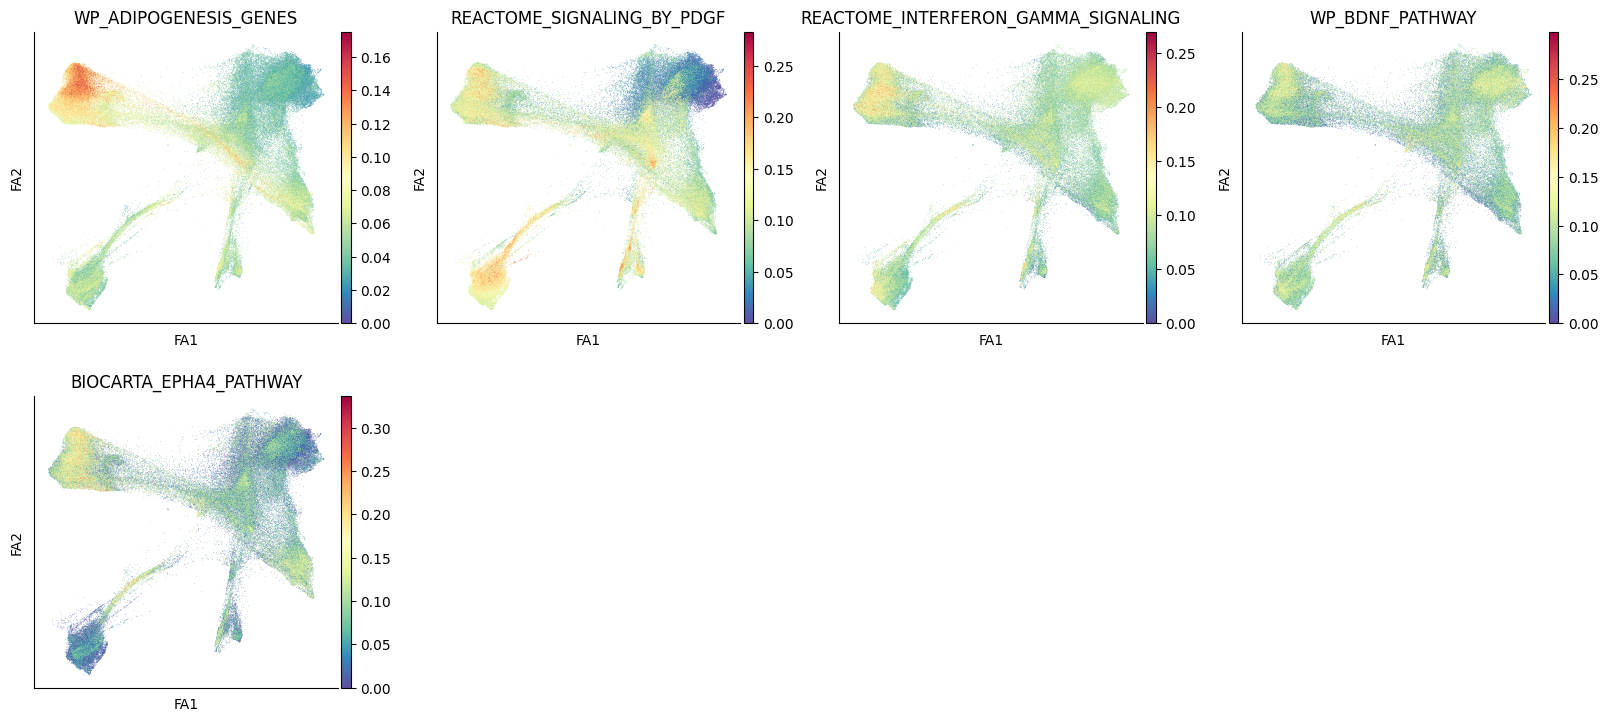

In [32]:
sc.pl.draw_graph(aucAdata,color=[
    "WP_ADIPOGENESIS_GENES",
    "REACTOME_SIGNALING_BY_PDGF",
    "REACTOME_INTERFERON_GAMMA_SIGNALING",
    "WP_BDNF_PATHWAY",
    "BIOCARTA_EPHA4_PATHWAY"
])

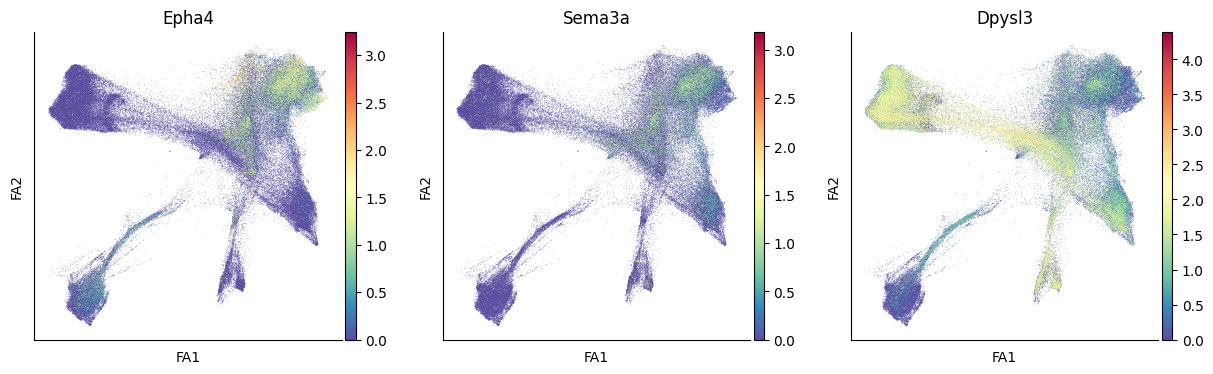

In [36]:
sc.pl.draw_graph(dpt,color=["Epha4","Sema3a","Dpysl3"],use_raw=False)

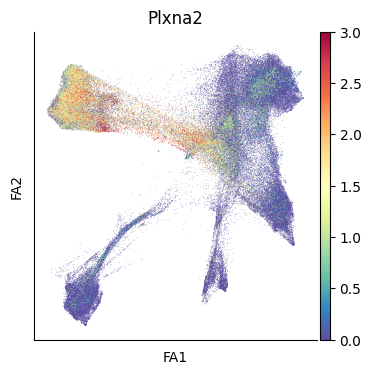

In [39]:
sc.pl.draw_graph(dpt,color=["Plxna2"],use_raw=False,vmax=3)

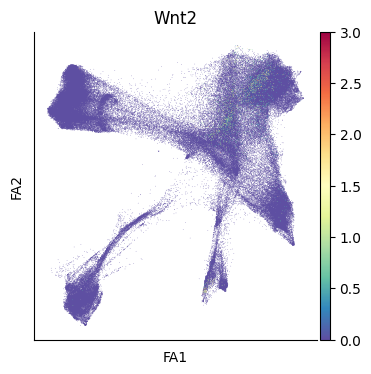

In [41]:
sc.pl.draw_graph(dpt,color=["Wnt2"],use_raw=False,vmax=3)

In [ ]:
test_pathways = [
    "WP_ADIPOGENESIS_GENES",
    "REACTOME_SIGNALING_BY_PDGF",
    "REACTOME_INTERFERON_GAMMA_SIGNALING",
]

adata.obs[ifn_pathways] = adata.obsm["aucell_estimate"][ifn_pathways]

In [45]:
dpt.obs[['lineage_chondro', 'lineage_laFibro', 'lineage_lepr', 'lineage_mesenchyme']]

,lineage_chondro,lineage_laFibro,lineage_lepr,lineage_mesenchyme
Unnamed: 0,,,,
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0,False,False,False,True
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0,False,False,False,True
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0,False,False,False,True
Suture2021_Farmer_E17_AAAGATGAGGGAACGG-1_1-0,False,False,False,True
Suture2021_Farmer_E17_AAAGTAGTCGGAGCAA-1_1-0,False,False,False,True
...,...,...,...,...
TTTGACTGTATTTCCT-1_5-1-2,False,False,True,False
TTTGACTGTTGCATTG-1_5-1-2,False,True,False,False
TTTGACTTCTTGGGCG-1_5-1-2,True,False,False,False


In [47]:
lienageCr=cr.Lineage(np.array(dpt.obs[['lineage_chondro', 'lineage_laFibro', 'lineage_lepr', 'lineage_mesenchyme']]).astype("int"),
                     names=["Chondro","Fibro","Lepr","Mes"])

In [52]:
dpt.var_names[dpt.var["highly_variable"]]

Index(['1190002N15Rik', '1200007C13Rik', '1500009L16Rik', '1500015O10Rik',
       '1700086L19Rik', '1810011O10Rik', '1810041L15Rik', '2010111I01Rik',
       '2200002D01Rik', '2810001G20Rik',
       ...
       'Zfhx3', 'Zfhx4', 'Zfp36', 'Zfp36l1', 'Zfp36l2', 'Zfp503', 'Zfp618',
       'Zfp703', 'Zim1', 'Zscan26'],
      dtype='object', length=1992)

In [59]:
model = cr.models.GAMR(dpt, n_knots=6, smoothing_penalty=10.0)

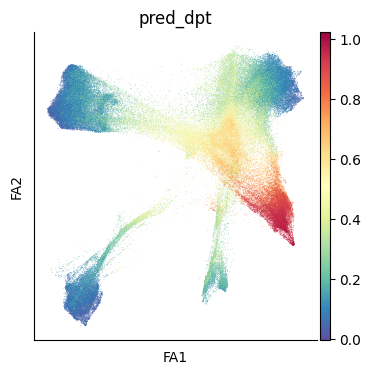

In [55]:
sc.pl.draw_graph(dpt,color="pred_dpt")

In [61]:
dpt.layers["log_count"]=dpt.X

In [63]:
cr.pl.cluster_trends(
    dpt,
    model=model,  # use the model from before
    lineage=["Chondro","Fibro","Lepr","Mes"],
    data_key="log_count",
    genes=dpt.var_names[dpt.var["highly_variable"]],
    time_key="pred_dpt",
    weight_threshold=(1e-3, 1e-3),
    n_jobs=20,
    random_state=0,
    clustering_kwargs={"resolution": 0.2, "random_state": 0},
    neighbors_kwargs={"random_state": 0},
)

TypeError: unhashable type: 'list'

  0%|          | 0/2 [00:00<?, ?gene/s]

Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.


2023-12-24 21:20:27.811031: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-24 21:20:27.811124: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-24 21:20:27.811249: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-24 21:20:30.692169: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


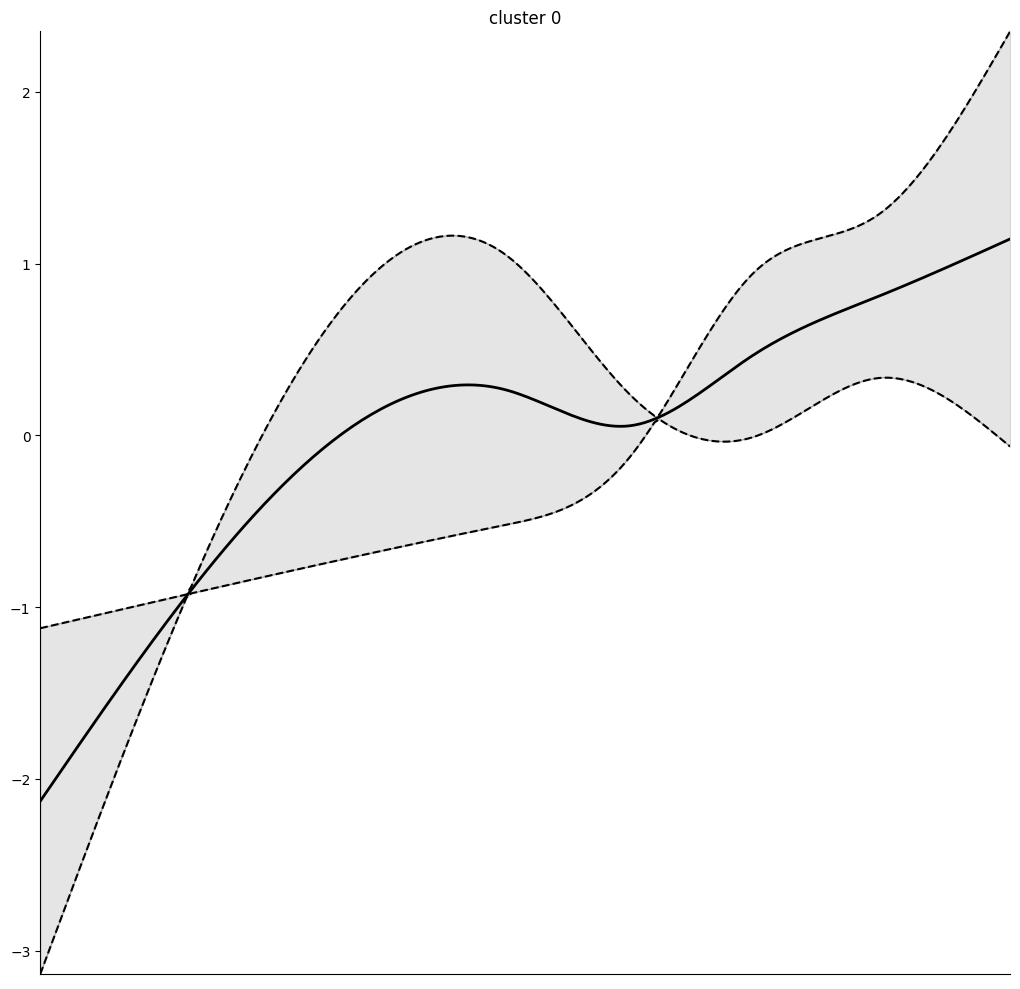

In [66]:
cr.pl.cluster_trends(
    dpt,
    model=model,  # use the model from before
    lineage="Mes",
    data_key="log_count",
    genes=["Sp7","Postn"],
    time_key="pred_dpt",
    weight_threshold=(1e-3, 1e-3),
    n_jobs=20,
    random_state=0,
    clustering_kwargs={"resolution": 0.2, "random_state": 0},
    neighbors_kwargs={"random_state": 0},
)

In [67]:
dpt

AnnData object with n_obs × n_vars = 166204 × 17312
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'le

In [49]:
dpt.obsm['lineages_fwd']=lienageCr

Chondro,Fibro,Lepr,Mes
0,0,0,1
0,0,0,1
0,0,0,1
0,0,0,1
0,0,0,1
0,0,0,1
0,0,0,1
0,0,0,1
0,0,0,1
0,0,0,1
